In [5]:
from expander import *
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
from random import uniform
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams["figure.figsize"] = (15, 15)

In [63]:
# from numpy import genfromtxt
# coords = genfromtxt('hammer.csv', delimiter=',')
# coords
# plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
# lengths, max_l = max_chord_length(coords, return_list=True)
# max_l

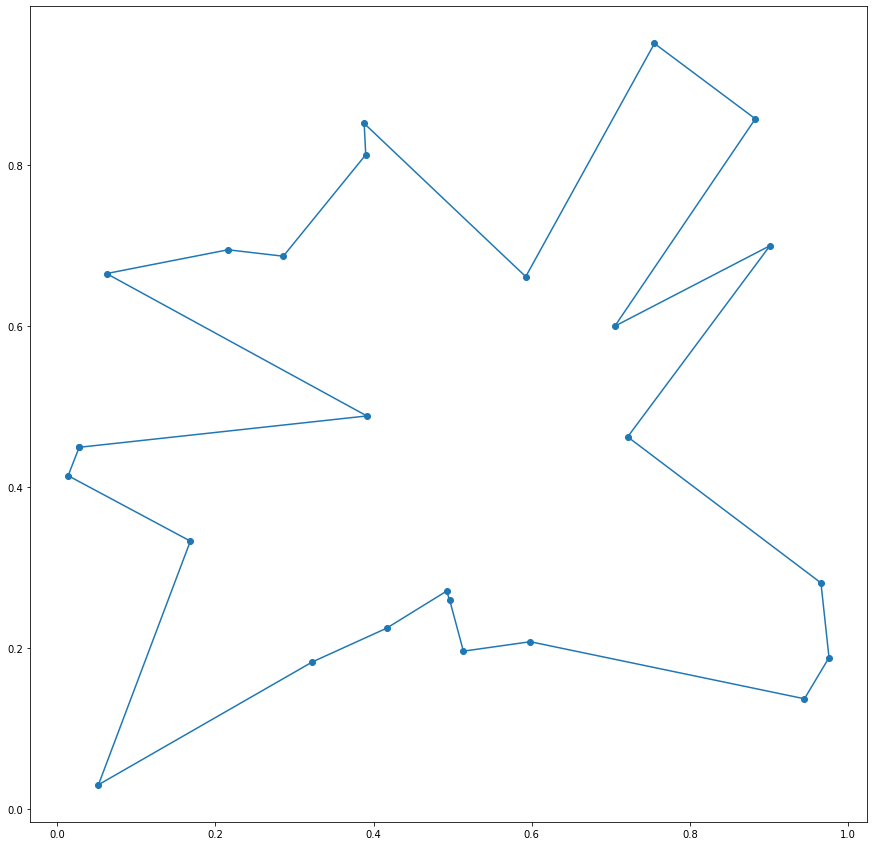

In [18]:
# generate a polygonal chain
coords = polygon(25)

# make into closed polygon
coords = list(coords)
coords.append(coords[0])
coords = np.array(coords)

# plot it
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

# get total chord length
lengths, max_l = max_chord_length(coords, return_list=True)
agg_lengths = compute_agg_lengths(lengths)

In [14]:
# objective function
def fun(x):
    a=x[0]
    b=x[1]
    if a>=b:
        return float('inf')
    return max(-max_l+b-a, -b+a)/(np.linalg.norm(gamma(coords, b, agg_lengths) - gamma(coords, a, agg_lengths)))

x0=[uniform(0, max_l), uniform(0, max_l)]
bnd = [(0,max_l),(0,max_l)]
start = time.time()

# res = scipy.optimize.basinhopping(fun, x0, niter=100, T=1.0, stepsize=0.5)
# res = scipy.optimize.differential_evolution(fun, bounds=bnd, tol=1e-11)
# res = scipy.optimize.dual_annealing(fun, bounds=bnd, maxiter=2000, initial_temp=5e4, visit=2.9)

rranges = (slice(0, max_l, max_l/100), slice(0, max_l, max_l/100))

res = scipy.optimize.brute(fun, rranges, full_output=True,
                          finish=scipy.optimize.fmin)

end = time.time()
print(f'{end - start:.2f} s')
res[0],res[1]

0.12 s


(array([2.64798562, 5.12876746]), -14.897531115283307)

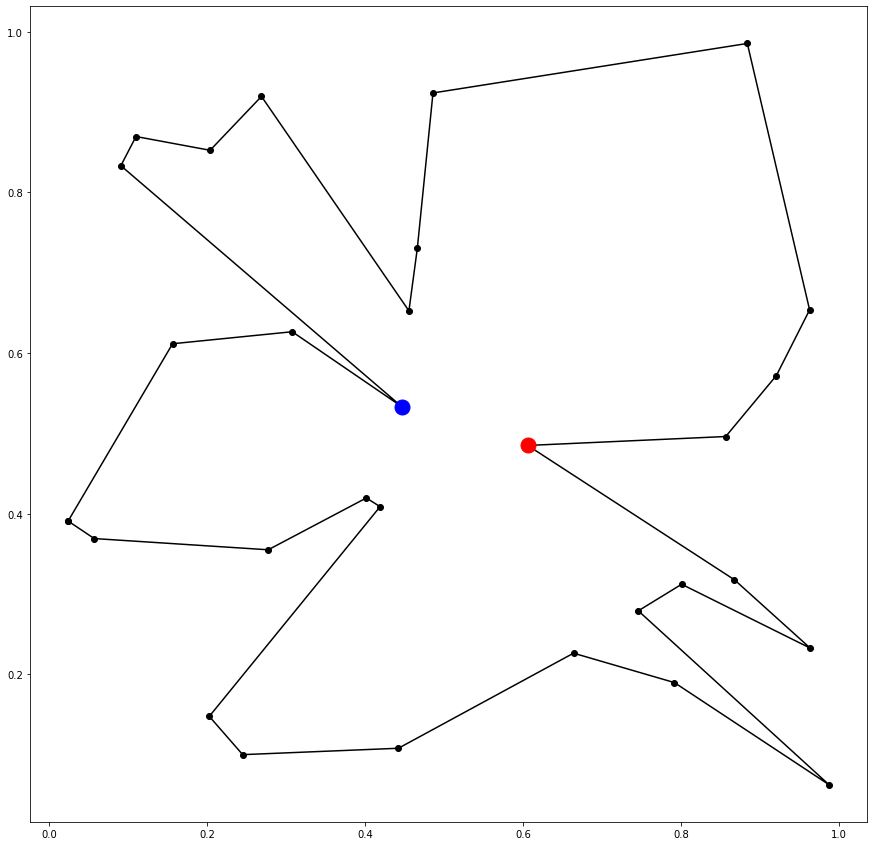

In [15]:
# plot the 2 points that attain the maximum Chord Arc Constant
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o', c='k')

point1 = gamma(coords, res[0][0])
point2 = gamma(coords, res[0][1])

plt.plot(point1[0],point1[1], '-o', c='r', markersize=15)
plt.plot(point2[0],point2[1], '-o', c='b', markersize=15)


# plt.plot(gamma(coords, 4)[0],gamma(coords, 4)[1], '-o', c='y', markersize=15)
# plt.plot(gamma(coords, 3.8)[0],gamma(coords, 3.8)[1], '-o', c='g', markersize=15)

In [28]:
# generate a polygonal chain
coords = polygon(29)

# make into closed polygon
coords = list(coords)
coords.append(coords[0])
coords = np.array(coords)

# plot it
# plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

# get total chord length
lengths, max_l = max_chord_length(coords, return_list=True)
agg_lengths = compute_agg_lengths(lengths)

In [38]:
# array([[0.08208004, 0.40961344],
#        [0.14043581, 0.38899364],
#        [0.13552379, 0.32580601],
#        [0.2078564 , 0.25626377],
#        [0.25957901, 0.27382533],
#        [0.38460258, 0.18884126],
#        [0.44453599, 0.05753382],
#        [0.51749249, 0.29065535],
#        [0.58505053, 0.15007438],
#        [0.53455408, 0.32227405],
#        [0.74654835, 0.13326328],
#        [0.77480479, 0.14944193],
#        [0.76533937, 0.16218751],
#        [0.99671577, 0.06513669],
#        [0.7013888 , 0.48035113],
#        [0.79420393, 0.75997261],
#        [0.97846251, 0.94251349],
#        [0.80288322, 0.82545381],
#        [0.52670265, 0.62709052],
#        [0.45517241, 0.58343237],
#        [0.43983775, 0.63839188],
#        [0.40091982, 0.99183512],
#        [0.38989723, 0.73236349],
#        [0.31724139, 0.88756136],
#        [0.37585667, 0.63004597],
#        [0.16576632, 0.93828928],
#        [0.27423594, 0.71579859],
#        [0.02199182, 0.66327641],
#        [0.00922091, 0.5552214 ],
#        [0.08208004, 0.40961344]])

In [39]:
def obj(x):
    a=x[0]
    b=x[1]
    return min(max_l-b+a, b-a)/(np.linalg.norm(gamma(coords, b, agg_lengths) - gamma(coords, a, agg_lengths)))
plt.rcParams["figure.figsize"] = (15, 15)

a = np.arange(0, max_l, max_l/600)
b = np.arange(0, max_l, max_l/600)

A, B = np.meshgrid(a, b)
nu = np.zeros((len(a),len(a)))

for i in range(len(nu)):
    for j in range(i):
        nu[i][j] = None
    for j in range(i, len(nu[i])):
        nu[i][j] = obj([a[i],b[j]])

/var/folders/sh/gj_9n4p54291vk7mp4m3lxb80000gn/T/ipykernel_15083/3353450107.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/var/folders/sh/gj_9n4p54291vk7mp4m3lxb80000gn/T/ipykernel_15083/3353450107.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(A, B, nu)


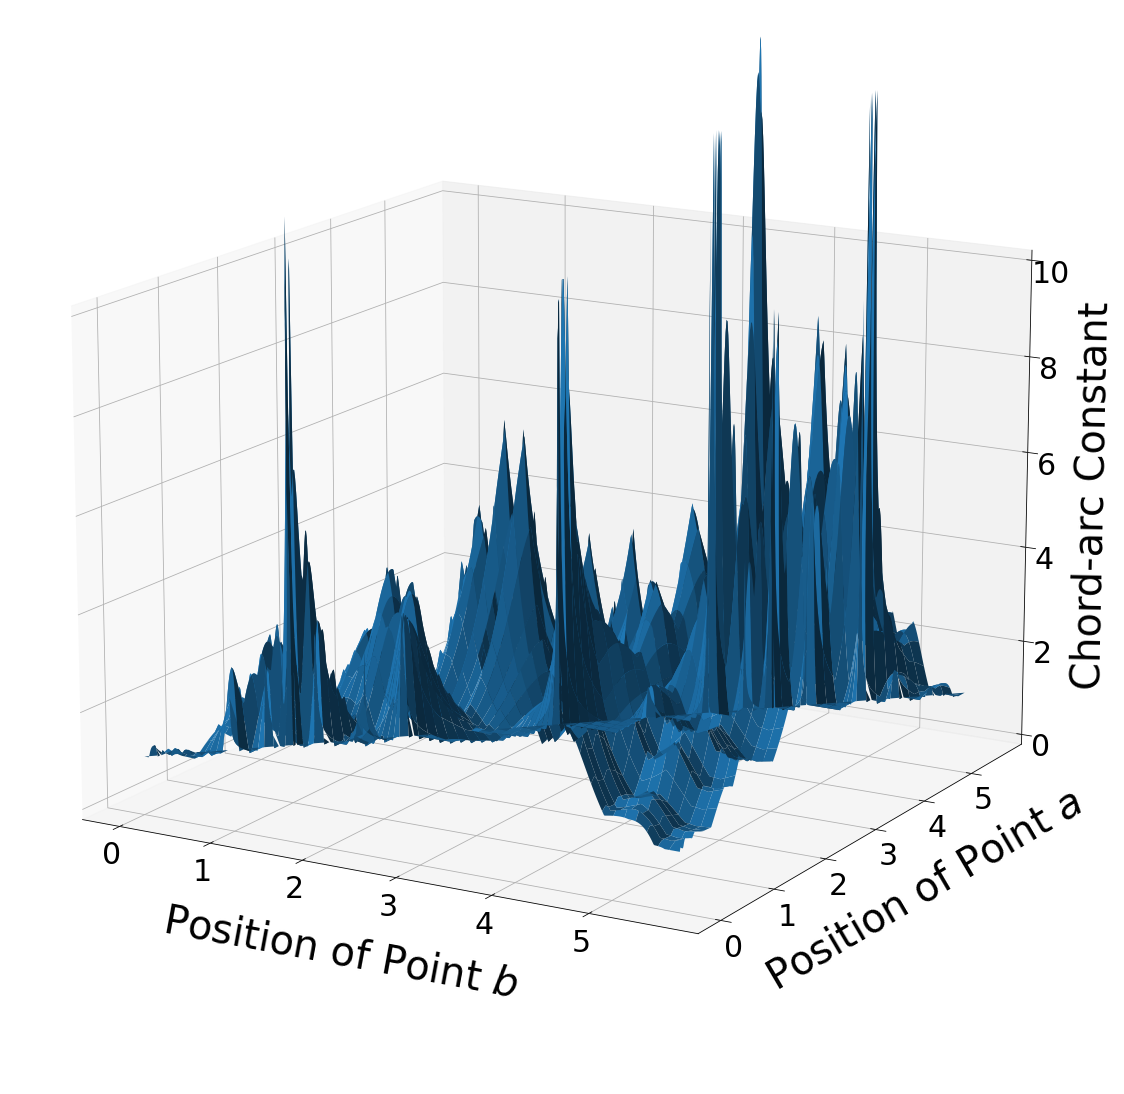

In [36]:
fig = plt.figure()

ax = Axes3D(fig)
ax.plot_surface(A, B, nu)
_=plt.xlabel('Position of Point $b$', fontsize=40, labelpad=40)
# _=plt.ylabel('Position of Point $a$', fontsize=30, labelpad=20)
_=ax.set_ylabel('Position of Point $a$', fontsize=40, labelpad=30)
_=ax.set_zlabel('Chord-arc Constant', fontsize=40, labelpad=20)
_=plt.xticks(fontsize=30)
_=plt.yticks(fontsize=30)
# _=ax.set_zticks(30)
_=ax.zaxis.set_tick_params(labelsize=30)
ax.set_zlim(0,10)
ax.view_init(15)
plt.show()
fig.savefig('opt_3d.png', dpi=300, bbox_inches='tight')

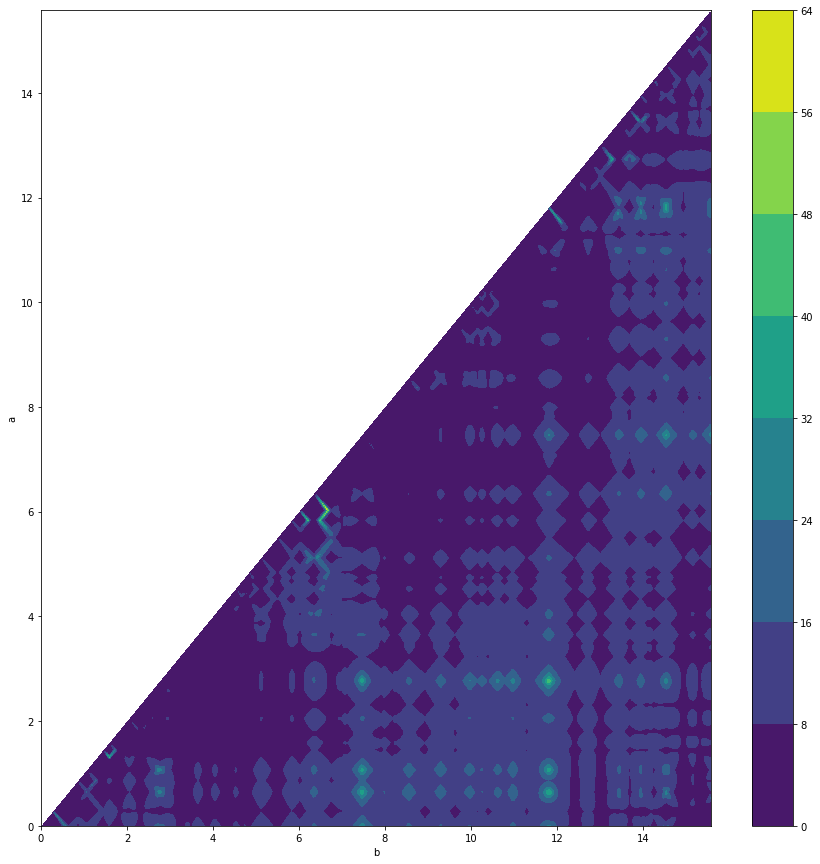

In [86]:
plt.contourf(A, B, nu)
plt.colorbar()
plt.xlabel('b')
plt.ylabel('a')
plt.show()